# Práctica 1: primera exploración a los datos



In [1]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

###### Exportamos la base con los datos para empezar la exploración de los datos.

In [2]:
path = 'vgsales.csv'
df = pd.read_csv(path,encoding='latin', error_bad_lines=False)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### General Stats

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Shape of dataframe

In [4]:
df.shape

(16598, 11)

#### Number of rows

In [5]:
df.shape[0]

16598

#### Number of columns

In [6]:
df.shape[1]

11

#### Column Names

In [7]:
df.columns.values.tolist()

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

Column Data Types

In [8]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

#### Are there missing values?

In [9]:
df.isnull().any().any()

True

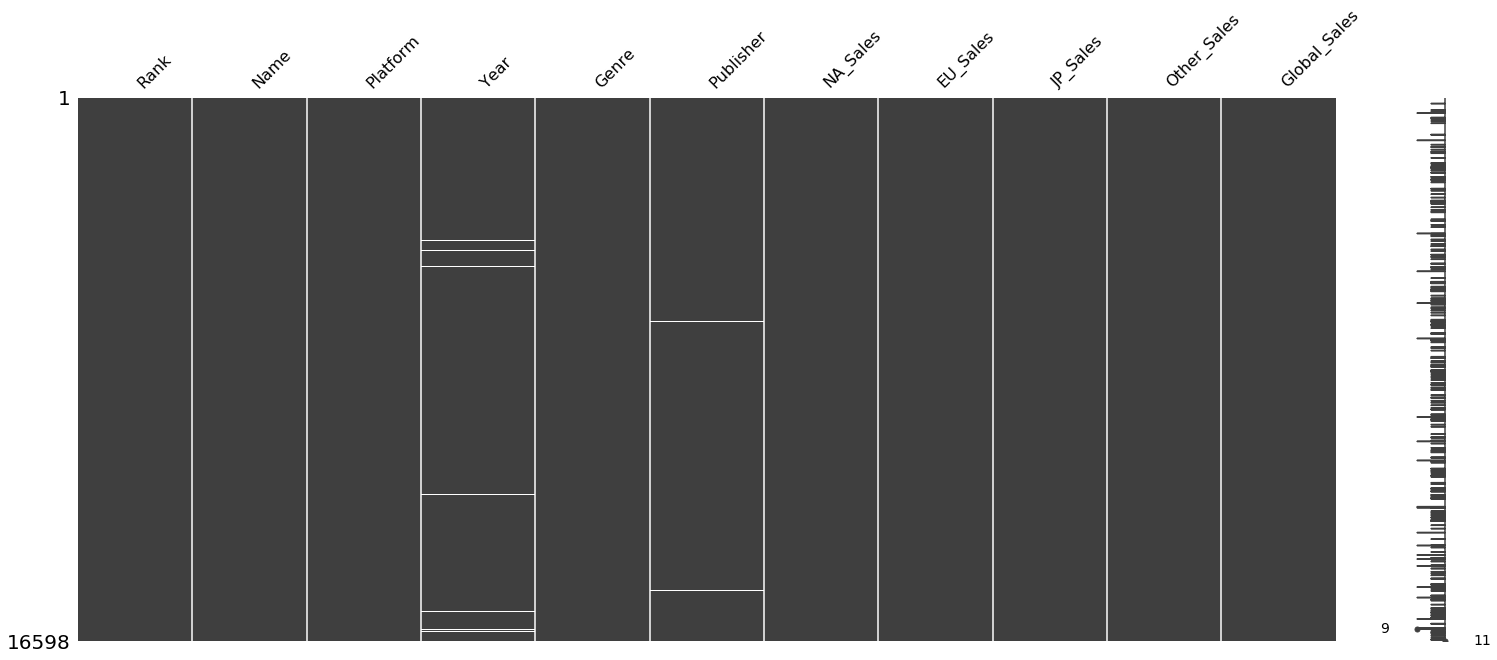

In [10]:
msno.matrix(df)

###### Nuestra data ya trae identificados los valores nulos, por lo tanto no srà necesario identificarlos

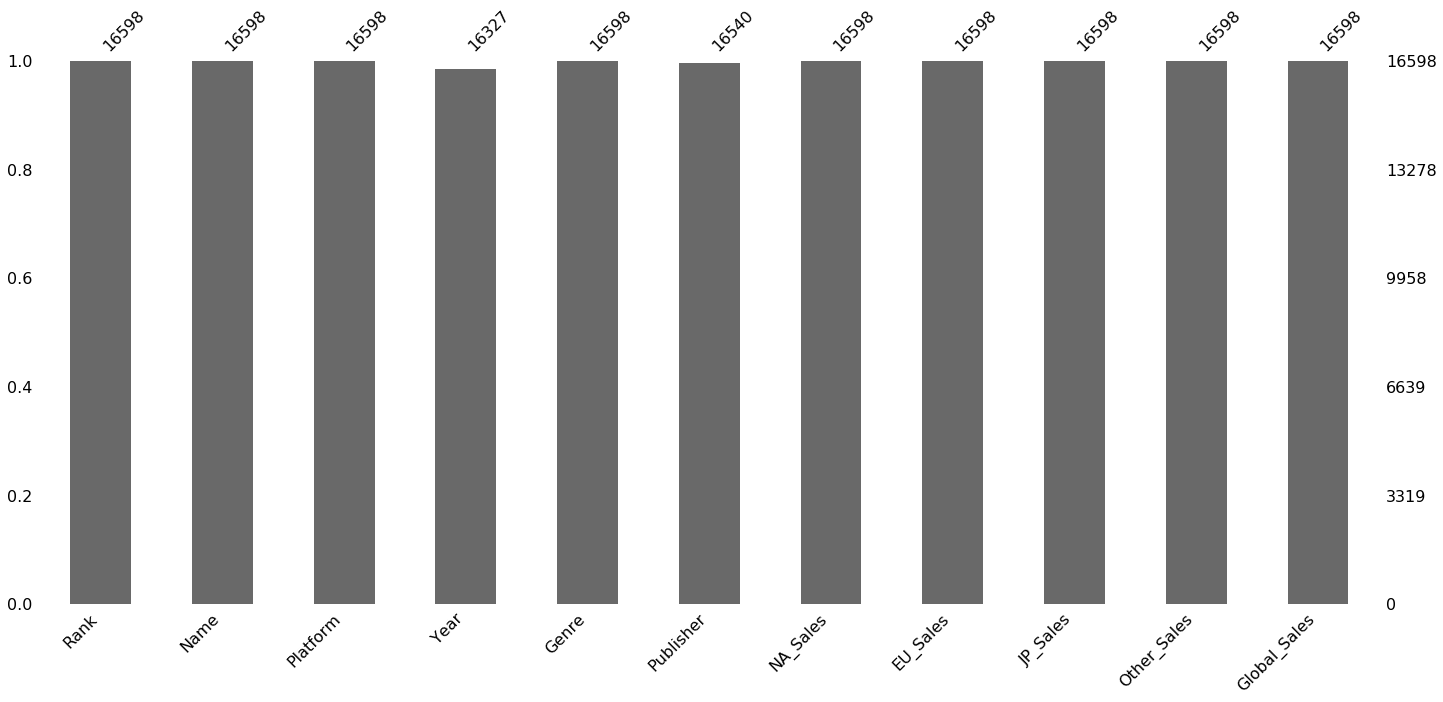

In [11]:
msno.bar(df)

#### Columns with Missing Values

In [12]:
df.columns[df.isnull().any()].tolist()

['Year', 'Publisher']

Number of rows with Missing Values

#### Summary Stats

Descipciones generales de nuestras variables

In [13]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


##### Selección de una o varias filas 

Select specific row index

In [14]:
df.loc[[0]]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


Select specific row indices

In [15]:
df.loc[30:33]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
30,31,PokÃ©mon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
32,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24


###### Analizamos los valores que puede tomar una variable

Get values for Platform

In [16]:
df.Platform.values

array(['Wii', 'NES', 'Wii', ..., 'PS2', 'DS', 'GBA'], dtype=object)

In [17]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [18]:
df.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

##### Get the number of unique values for each column

In [19]:
df.agg(['count', 'size', 'nunique'])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598,16598,16598,16327,16598,16540,16598,16598,16598,16598,16598
size,16598,16598,16598,16598,16598,16598,16598,16598,16598,16598,16598
nunique,16598,11493,31,39,12,578,409,305,244,157,623


An `agg` within a `groupby`. And`stack` at the end.

###### Agruparemos nuestros datos por Plataforma

In [20]:
df.groupby('Platform').agg(['count', 'size', 'nunique']).stack().sort_values(by='Platform').head(15)

Rank  Name  Year  Genre  Publisher  NA_Sales  EU_Sales  \
Platform                                                                   
2600     count     133   133   116    133        133       133       133   
         size      133   133   133    133        133       133       133   
         nunique   133   133    10     10         26        75        18   
3DO      count       3     3     3      3          3         3         3   
         size        3     3     3      3          3         3         3   
         nunique     3     3     2      3          3         1         1   
3DS      count     509   509   500    509        507       509       509   
         size      509   509   509    509        509       509       509   
         nunique   509   509     6     12         81        67        64   
DC       nunique    52    52     7      9         15         7         6   
         size       52    52    52     52         52        52        52   
         count      52    52    52     52         52        52        52   
DS       count    2163  2163  2133   2163       2156      2163      2163   
         size     2163  2163  2163   2163       2163      2163      2163   
         nunique  2163  2163    13     12        175       142       111   

                  JP_Sales  Other_Sales  Global_Sales  
Platform                                               
2600     count         133          133           133  
         size          133          133           133  
         nunique         1            6            77  
3DO      count           3            3             3  
         size            3            3             3  
         nunique         2            1             2  
3DS      count         509          509           509  
         size          509          509           509  
         nunique        77           27           119  
DC       nunique        32            5            34  
         size           52           52            52  
         count          52           52            52  
DS       count        2163         2163          2163  
         size         2163         2163          2163  
         nunique       104           54           207

### Data Transform

Drop Rows with missing `count` 

In [21]:
df_dropped = df.dropna(subset=['Publisher'])
df_dropped.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
df_dropped.shape

(16540, 11)

Copy of df

In [23]:
df_copy = df.copy()
df_copy.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [24]:
df_copy.shape

(16598, 11)

### Handling Categorical Data

In [25]:
list(df['Genre'].unique())

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy']

###### Create a dictionary

Crearemos el diccionario sobre la columna de 'Genre'

In [26]:
keys = list(df['Genre'].unique())
vals = range(1,13)
act = dict(zip(keys, vals))
act

{'Sports': 1,
 'Platform': 2,
 'Racing': 3,
 'Role-Playing': 4,
 'Puzzle': 5,
 'Misc': 6,
 'Shooter': 7,
 'Simulation': 8,
 'Action': 9,
 'Fighting': 10,
 'Adventure': 11,
 'Strategy': 12}

Creamos una nueva variable donde tengamos los generos como etiquetas numéricas.

In [27]:
df_copy['Genre_2'] = df['Genre'].map(act)
df_copy.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_2
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,4


### Data Summarization
Preparing a compact representation of raw data at hand


In [28]:
df_copy.groupby(["Year","Publisher", "Genre",]).count()

Rank  Name  Platform  NA_Sales  EU_Sales  \
Year   Publisher       Genre                                                    
1980.0 Activision      Action           1     1         1         1         1   
                       Fighting         1     1         1         1         1   
                       Misc             2     2         2         2         2   
                       Sports           1     1         1         1         1   
       Atari           Misc             2     2         2         2         2   
...                                   ...   ...       ...       ...       ...   
2016.0 dramatic create Action           1     1         1         1         1   
                       Adventure        1     1         1         1         1   
2017.0 Idea Factory    Action           1     1         1         1         1   
       Sega            Role-Playing     2     2         2         2         2   
2020.0 Ubisoft         Simulation       1     1         1         1         1   

                                     JP_Sales  Other_Sales  Global_Sales  \
Year   Publisher       Genre                                               
1980.0 Activision      Action               1            1             1   
                       Fighting             1            1             1   
                       Misc                 2            2             2   
                       Sports               1            1             1   
       Atari           Misc                 2            2             2   
...                                       ...          ...           ...   
2016.0 dramatic create Action               1            1             1   
                       Adventure            1            1             1   
2017.0 Idea Factory    Action               1            1             1   
       Sega            Role-Playing         2            2             2   
2020.0 Ubisoft         Simulation           1            1             1   

                                     Genre_2  
Year   Publisher       Genre                  
1980.0 Activision      Action              1  
                       Fighting            1  
                       Misc                2  
                       Sports              1  
       Atari           Misc                2  
...                                      ...  
2016.0 dramatic create Action              1  
                       Adventure           1  
2017.0 Idea Factory    Action              1  
       Sega            Role-Playing        2  
2020.0 Ubisoft         Simulation          1  

[5917 rows x 9 columns]

In [29]:
df_copy.groupby(["Year", "Publisher"])[["Genre", "Platform"]].count()

Genre  Platform
Year   Publisher                                    
1980.0 Activision                        5         5
       Atari                             4         4
1981.0 20th Century Fox Video Games      3         3
       Activision                        6         6
       Atari                            11        11
...                                    ...       ...
2016.0 Yeti                              1         1
       dramatic create                   2         2
2017.0 Idea Factory                      1         1
       Sega                              2         2
2020.0 Ubisoft                           1         1

[2321 rows x 2 columns]

In [30]:
df_copy.groupby(["Year", "Publisher"]).agg({'EU_Sales':np.mean,'JP_Sales':np.mean})

EU_Sales  JP_Sales
Year   Publisher                                       
1980.0 Activision                    0.036000     0.000
       Atari                         0.122500     0.000
1981.0 20th Century Fox Video Games  0.023333     0.000
       Activision                    0.076667     0.000
       Atari                         0.042727     0.000
...                                       ...       ...
2016.0 Yeti                          0.000000     0.020
       dramatic create               0.000000     0.015
2017.0 Idea Factory                  0.000000     0.010
       Sega                          0.000000     0.020
2020.0 Ubisoft                       0.000000     0.000

[2321 rows x 2 columns]

### Data Visualization

#### Scatter plots

Variables able to be highly correlated. To confirm or validate our hypothesis.

###### Queremos ver como se comportan las ventas globales que se tuvieron por año

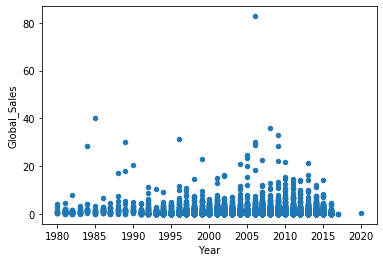

In [31]:
df_copy['Year'] = df_copy['Year'].astype('float')

df_copy.plot(kind='scatter',x='Year',y='Global_Sales')

#### Histograms

Text(0.5, 1.0, 'Frequency of Genre')

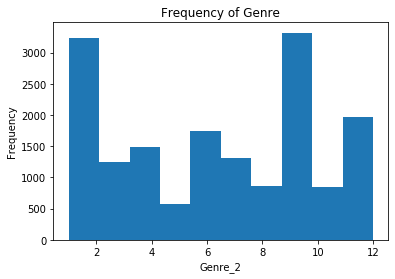

In [32]:
plt.hist(df_copy['Genre_2'])
plt.xlabel('Genre_2')
plt.ylabel('Frequency')
plt.title('Frequency of Genre')

Text(0.5, 1.0, 'Frequency of Platform')

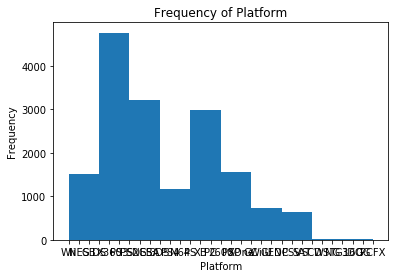

In [33]:
plt.hist(df_copy['Platform'])
plt.xlabel('Platform')
plt.ylabel('Frequency')
plt.title('Frequency of Platform')

#### Boxplots

Text(0.5, 1.0, 'Box Plot of Global Sales count')

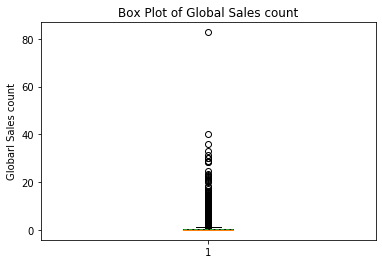

In [34]:
#plt.boxplot(df_sample['ventas'])
plt.boxplot(df_copy['Global_Sales'], showmeans=True, meanline=True)
plt.ylabel('Globarl Sales count')
plt.title('Box Plot of Global Sales count')